# **Import Libary**

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# **Load Image & Delete long tail**

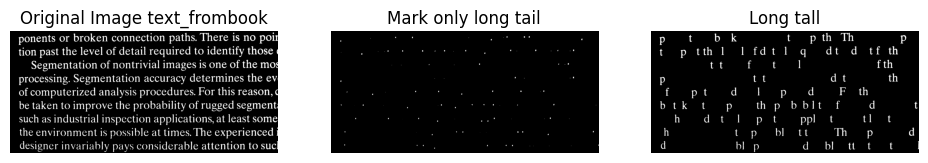

In [38]:
ori_image = cv2.imread('image/text_frombook.png',0) 

# จากคริปอาจารย์
def imreconstruct(img,marker):
    mask = img
    se = cv2.getStructuringElement(cv2.MORPH_RECT , (3,3))
    recon1 = marker
    recon1_old = np.zeros(recon1.shape , np.int8)
    while np.sum(np.sum(recon1 - recon1_old)) != 0 :
        recon1_old = recon1
        recon1 = cv2.dilate(recon1 , se)
        recon1 = recon1 & mask
    return recon1

se = cv2.getStructuringElement(cv2.MORPH_RECT , (1,51))
mark_img1 = cv2.erode(ori_image,se)

lt_img = imreconstruct(ori_image,mark_img1)

# Display the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(ori_image,cmap='gray')
plt.axis('off')
plt.title("Original Image text_frombook")

plt.subplot(1, 5, 2)
plt.imshow(mark_img1,cmap='gray')
plt.axis('off')
plt.title("Mark only long tail")

plt.subplot(1, 5, 3)
plt.imshow(lt_img,cmap='gray')
plt.axis('off')
plt.title("Long tall")

plt.show()

# **Biwise & FloodFill**

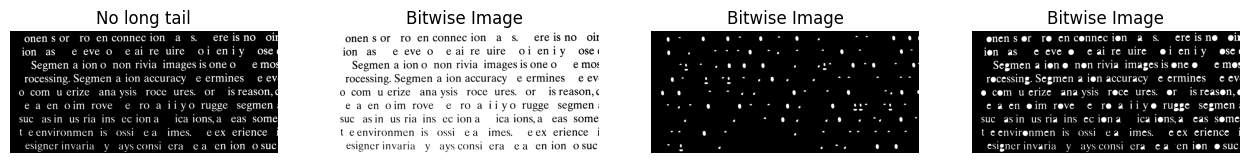

In [49]:
nolt_image = ori_image - lt_img

bw_image = cv2.bitwise_not(nolt_image)

h , w = bw_image.shape[:2]
mask = np.zeros((h+2,w+2) , np.uint8)

image_mark2 = bw_image.copy()
cv2.floodFill(image_mark2,mask,(0,0),0)

marge_image = nolt_image | image_mark2

plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(nolt_image,cmap='gray')
plt.axis('off')
plt.title("No long tail")

plt.subplot(1, 5, 2)
plt.imshow(bw_image,cmap='gray')
plt.axis('off')
plt.title("Bitwise Image")

plt.subplot(1, 5, 3)
plt.imshow(image_mark2,cmap='gray')
plt.axis('off')
plt.title("Bitwise Image")

plt.subplot(1, 5, 4)
plt.imshow(marge_image,cmap='gray')
plt.axis('off')
plt.title("Bitwise Image")

plt.show()

# **Erode only circle & Dilate for find 'O'** 

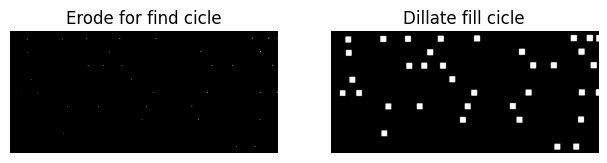

In [54]:
se = cv2.getStructuringElement(cv2.MORPH_RECT , (27,27))
find_point = cv2.erode(marge_image,se)

se = cv2.getStructuringElement(cv2.MORPH_RECT , (40,40))
fill_point = cv2.dilate(find_point,se)

plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(find_point,cmap='gray')
plt.axis('off')
plt.title("Erode for find cicle")

plt.subplot(1, 5, 2)
plt.imshow(fill_point,cmap='gray')
plt.axis('off')
plt.title("Dillate fill cicle")

plt.show()

# **Delete Excess**

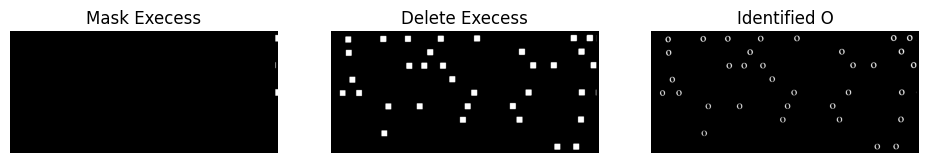

In [61]:
h , w = ori_image.shape[:2]
mask = np.zeros((h,w) , np.uint8)

mask[:,1998:2018] = fill_point[:,1998:2018]

delete_excess = fill_point - mask

identified_O = ori_image & delete_excess

cv2.imwrite('image/identified_o.png',identified_O)

plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.title("Mask Execess")

plt.subplot(1, 5, 2)
plt.imshow(delete_excess,cmap='gray')
plt.axis('off')
plt.title("Delete Execess")

plt.subplot(1, 5, 3)
plt.imshow(identified_O,cmap='gray')
plt.axis('off')
plt.title("Identified O")

plt.show()